In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
import seaborn as sns
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
path = "/Users/adriannapinzariu/Desktop/LIDC_newMode_2022 (1).csv"

In [3]:
df = pd.read_csv(path)

In [4]:
# Drop non-numeric columns
df = df.select_dtypes(include=['float', 'int'])

# Drop rows with NaN values
df = df.dropna()

In [5]:
# use DataFrame.loc[] method to filter the columns
sortByDf = df.loc[:, ['Malignancy', 'Spiculation']]

# print the resulting dataframe
print(sortByDf)

      Malignancy  Spiculation
0              5            5
1              5            1
2              5            2
3              4            2
4              4            1
...          ...          ...
2682           4            2
2683           2            1
2684           2            1
2685           5            2
2686           2            1

[2622 rows x 2 columns]


In [6]:
df = df.drop(['RadiologistID', 'Subtlety_1', 'InternalStructure_1', 'Sphericity_1', 'Margin_1', 'Lobulation_1', 'Spiculation_1', 'Texture_1', 'Malignancy_1', 'Subtlety_2', 'InternalStructure_2', 'Sphericity_2', 'Margin_2', 'Lobulation_2', 'Spiculation_2', 'Texture_2', 'Malignancy_2', 'Subtlety_3', 'InternalStructure_3', 'Sphericity_3', 'Margin_3', 'Lobulation_3', 'Spiculation_3', 'Texture_3', 'Malignancy_3', 'Subtlety_4', 'InternalStructure_4', 'Sphericity_4', 'Margin_4', 'Lobulation_4', 'Spiculation_4', 'Texture_4', 'Malignancy_4', 'Subtlety', 'InternalStructure', 'Sphericity', 'Margin', 'Lobulation', 'Spiculation', 'Texture'], axis=1)

In [7]:
df = df.drop(['Calcification_1', 'Calcification_2', 'Calcification_3', 'Calcification_4', 'Calcification'], axis = 1)

In [8]:
df = df.drop(['Malignancy', 'noduleID', 'InstanceID', 'imageZposition', 'PixelSpacing', 'PixelArea','SecondMoment', 'SuperscribedDiameter'], axis = 1)

In [9]:
df.columns

Index(['Area', 'ConvexArea', 'Perimeter', 'ConvexPerimeter', 'EquivDiameter',
       'MajorAxisLength', 'MinorAxisLength', 'Elongation', 'Compactness',
       'Eccentricity', 'Solidity', 'Extent', 'Circularity', 'RadialDistanceSD',
       'Roughness', 'MinIntensity', 'MaxIntensity', 'MeanIntensity',
       'SDIntensity', 'MinIntensityBG', 'MaxIntensityBG', 'MeanIntensityBG',
       'SDIntensityBG', 'IntensityDifference', 'markov1', 'markov2', 'markov3',
       'markov4', 'markov5', 'gabormean_0_0', 'gaborSD_0_0', 'gabormean_0_1',
       'gaborSD_0_1', 'gabormean_0_2', 'gaborSD_0_2', 'gabormean_1_0',
       'gaborSD_1_0', 'gabormean_1_1', 'gaborSD_1_1', 'gabormean_1_2',
       'gaborSD_1_2', 'gabormean_2_0', 'gaborSD_2_0', 'gabormean_2_1',
       'gaborSD_2_1', 'gabormean_2_2', 'gaborSD_2_2', 'gabormean_3_0',
       'gaborSD_3_0', 'gabormean_3_1', 'gaborSD_3_1', 'gabormean_3_2',
       'gaborSD_3_2', 'Contrast', 'Correlation', 'Energy', 'Homogeneity',
       'Entropy', 'x_3rdordermoment

In [10]:
df.head()

,Area,ConvexArea,Perimeter,ConvexPerimeter,EquivDiameter,MajorAxisLength,MinorAxisLength,Elongation,Compactness,Eccentricity,...,Correlation,Energy,Homogeneity,Entropy,x_3rdordermoment,Inversevariance,Sumaverage,Variance,Clustertendency,MaxProbability
0,1094,1286,168.852814,135.372918,37.321898,42.803687,35.834900,1.194469,2.073908,0.546909,...,0.894,0.0003,0.0532,8.15,1290000,0.0223,661.0,143000,541000,0.0009
1,918,951,121.840620,116.923682,34.188213,42.015647,28.631957,1.467439,1.286861,0.731856,...,0.781,0.0005,0.0567,7.76,11100000,0.0221,260.0,32700,115000,0.0012
2,931,1062,148.267027,119.799290,34.429435,39.635819,30.844618,1.285016,1.879012,0.628016,...,0.899,0.0004,0.0572,8.03,735000,0.0247,416.0,111000,420000,0.0010
3,161,167,51.455844,49.201081,14.317527,18.125068,11.574663,1.565926,1.308681,0.769539,...,0.692,0.0027,0.0312,6.03,-469000,0.0107,420.0,98700,333000,0.0043
4,246,251,58.769553,57.721132,17.697936,18.324991,17.321312,1.057945,1.117274,0.326408,...,0.793,0.0018,0.0764,6.43,8600000,0.0392,565.0,137000,492000,0.0052


In [11]:
import umap.umap_ as umap

In [12]:
# Scaling the Data
scaled_df = StandardScaler().fit_transform(df)

In [13]:
# UMAP
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
embedding = umap_model.fit_transform(scaled_df)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [14]:
embedding.shape

(2622, 2)

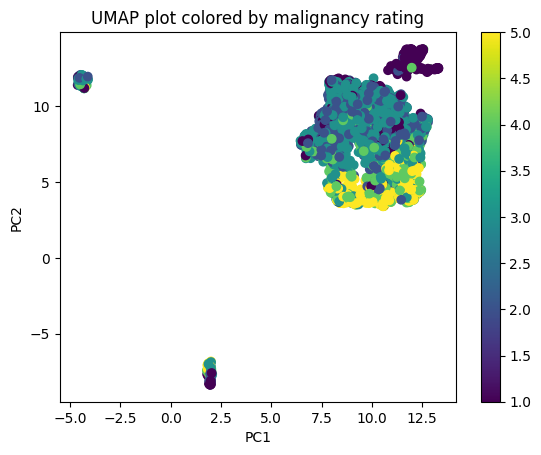

In [15]:
# Plot the UMAP visualization, color-coded by the malignancy rating in sortByDf
plt.scatter(embedding[:, 0], embedding[:, 1], c=sortByDf['Malignancy'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('UMAP plot colored by malignancy rating')
plt.colorbar()
plt.show()

In [16]:
# Set up lists to store distortions and inertias
distortions = []
inertias = []

In [17]:
# Set up dictionaries to store mappings
mapping1 = {}
mapping2 = {}

In [18]:
# Set up range of k values to test
K = range(2, 13)

In [19]:
# Loop through each k value
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df)
    kmeanModel.fit(df)
  
    # Calculate distortion and inertia
    distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    # Store distortion and inertia mappings
    mapping1[k] = sum(np.min(cdist(df, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df.shape[0]
    mapping2[k] = kmeanModel.inertia_

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

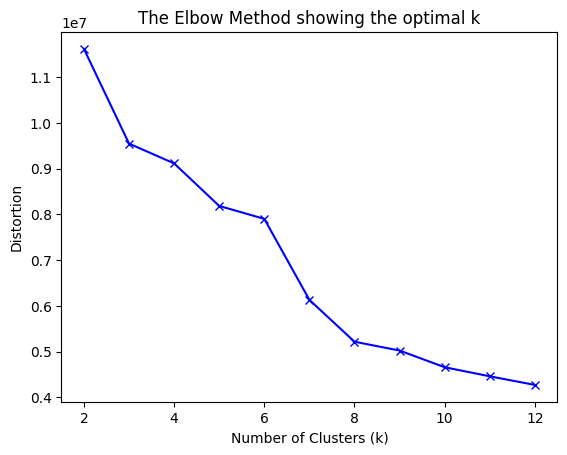

In [20]:
# Plot the elbow curve
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [21]:
# Use kneed to find the elbow point
kneedle = KneeLocator(K, distortions, S=1.0, curve='convex', direction='decreasing')
elbow = kneedle.elbow

In [22]:
# Print the index of the elbow point
print("The elbow point is at index", elbow)

The elbow point is at index 8
